## Quantum Molecular Dynamics using Trotterization.

Quantum molecular dynamics is a crucial field for simulating the time evolution of molecular systems, where quantum mechanical effects cannot be ignored. Trotterization is one of the primary techniques used to break down the time-evolution operator into manageable components that can be efficiently simulated on quantum computers. This method leverages the idea that the exponential of a sum of non-commuting operators can be approximated as a sequence of exponentials of individual operators. This is the key to enabling the simulation of molecular systems on near-term quantum devices.

The process of simulating quantum molecular dynamics via Trotterization begins with the molecular Hamiltonian, which encapsulates the system's energy states and interactions between particles. This Hamiltonian is expressed as a sum of terms that typically include kinetic and potential energy operators. Since these terms often do not commute, simulating the full time evolution under the exact Hamiltonian would be computationally intractable. Trotterization overcomes this by discretizing time into small steps and approximating the evolution as a product of exponentials of these terms over each time step. The accuracy of the approximation depends on the size of these steps, with smaller steps offering better accuracy at the cost of higher computational complexity.

In quantum computing, this method has particular importance. By using Trotterization, we can simulate complex molecular interactions and study phenomena like chemical reactions, bonding, and material properties. For example, simulating the time-dependent Schrödinger equation in a Trotterized form allows us to capture molecular dynamics more efficiently compared to classical methods. As quantum hardware continues to improve, the precision and scalability of Trotterization methods will further unlock the potential of quantum chemistry, enabling engineers and researchers to explore molecular processes with unprecedented detail.

Trotterization provides a pathway for simulating the time evolution of molecular systems on quantum computers, crucial for advancing quantum chemistry simulations and understanding complex molecular behaviors.

### Trotterization Formula

**Trotter's formula** provides a way to approximate the time evolution operator of a Hamiltonian that is a sum of simpler terms.

### Basic Formula
For a Hamiltonian $H = H_1 + H_2$, the Trotter-Suzuki formula is:

$$
U(t) \approx \left[ e^{-iH_1 t/n} e^{-iH_2 t/n} \right]^n
$$

Where:
* $U(t) = e^{-iHt}$ is the exact time evolution operator.
* $n$ is the number of Trotter steps.

#### Higher-Order Formulas
For better approximations, higher-order Trotter-Suzuki formulas can be used. For example, the second-order formula:

$$
U(t) \approx \left[ e^{-iH_1 t/2n} e^{-iH_2 t/n} e^{-iH_1 t/2n} \right]^n
$$

#### Generalization for Multiple Terms
For a Hamiltonian $H = \sum_{j=1}^m H_j$, the Trotter-Suzuki formula can be generalized as:

$$
U(t) \approx \left[ e^{-iH_1 t/n} e^{-iH_2 t/n} \cdots e^{-iH_m t/n} \right]^n
$$

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_histogram, plot_state_hinton
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define the molecular Hamiltonian (example)
h_pauli_terms = {
    "XX": 0.5,
    "YY": 0.5,
    "ZZ": 1.0
}

In [3]:
# Create the Hamiltonian as a SparsePauliOp
pauli_labels = [Pauli(label) for label in h_pauli_terms.keys()]
coefficients = np.array(list(h_pauli_terms.values()), dtype=complex)  # Ensure coefficients are in the correct format
hamiltonian = SparsePauliOp(pauli_labels, coefficients)

In [4]:
# Define the time evolution operator via Trotterization
def trotterize(hamiltonian, time, steps):
    dt = time / steps
    trotter_circuit = QuantumCircuit(2)
    
    for _ in range(steps):
        for pauli_op, coef in zip(hamiltonian.paulis, hamiltonian.coeffs):
            if pauli_op == Pauli("XX"):
                trotter_circuit.rxx(2 * coef.real * dt, 0, 1)
            elif pauli_op == Pauli("YY"):
                trotter_circuit.ryy(2 * coef.real * dt, 0, 1)
            elif pauli_op == Pauli("ZZ"):
                trotter_circuit.rzz(2 * coef.real * dt, 0, 1)
    
    return trotter_circuit

In [5]:
# Define the total time and number of Trotter steps
total_time = 1.0
time_steps = 10

In [6]:
# Create the Trotterized quantum circuit
trotter_circuit = trotterize(hamiltonian, total_time, time_steps)

In [7]:
# Save vector
trotter_circuit.save_statevector()

In [8]:
# Simulate the quantum circuit using AerSimulator
simulator = AerSimulator(method='statevector')
transpiled_circuit = transpile(trotter_circuit, simulator)

In [9]:
# Run the simulation to get the statevector
job = simulator.run(transpiled_circuit)
result = job.result()


In [10]:
# Get the final statevector
state = result.get_statevector()
print(state)

Statevector([5.40302306e-01-8.41470985e-01j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             1.38546697e-18+1.38084567e-17j],
            dims=(2, 2))


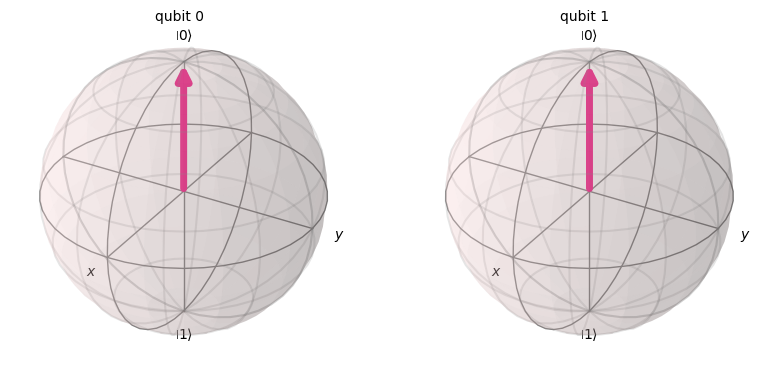

In [11]:
# Visualize the results using multiple visualizations
plot_bloch_multivector(state)
plt.show()

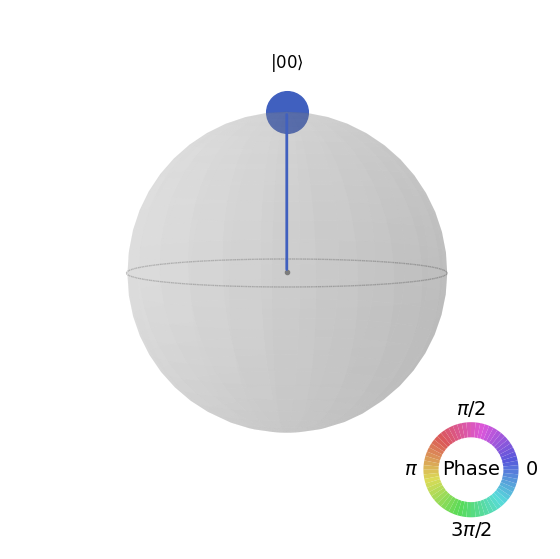

In [12]:
# QSphere plot
plot_state_qsphere(state)
plt.show()

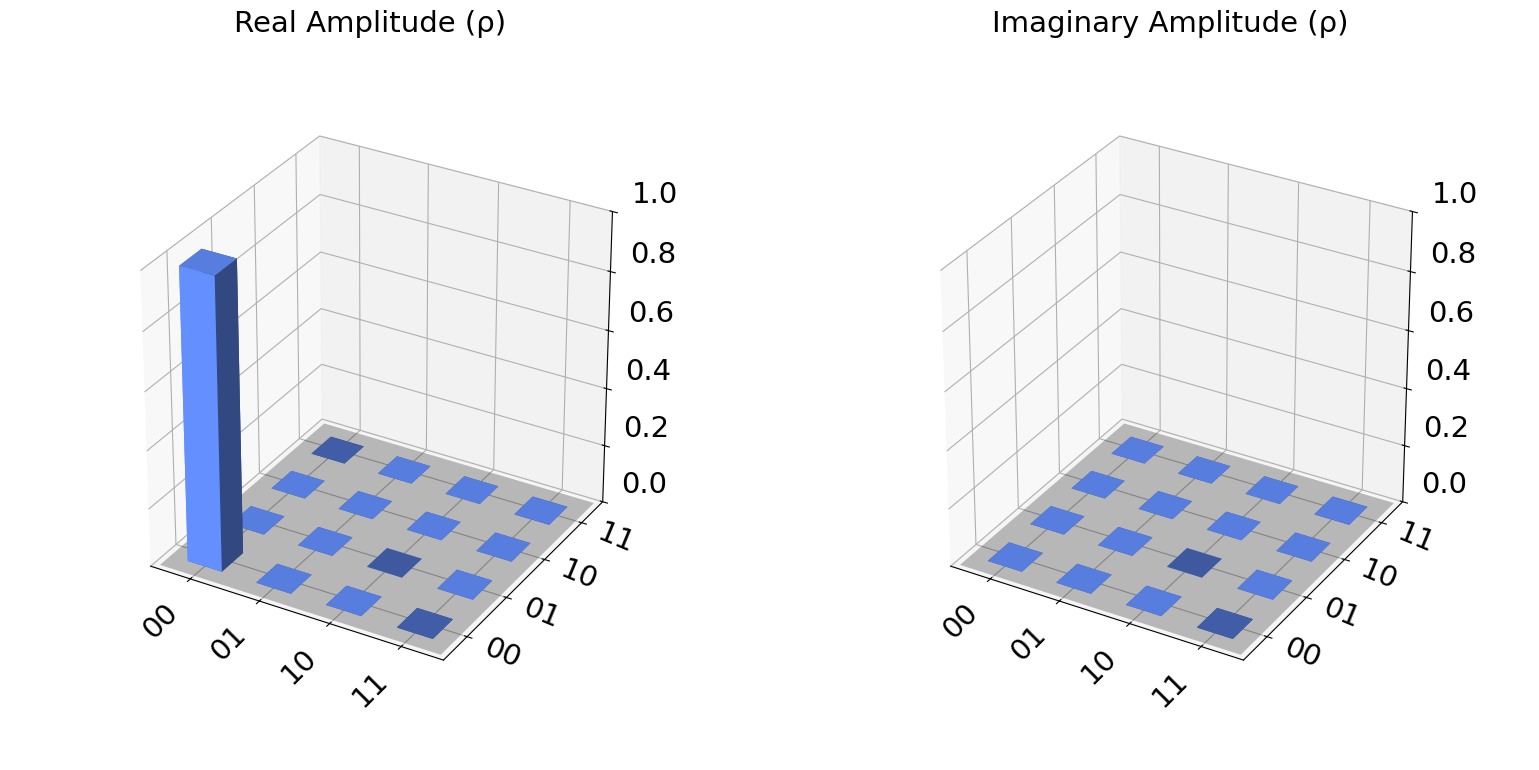

In [13]:
plot_state_city(state)
plt.show()



In [14]:
# # Partial trace to examine the reduced state of qubit 0
# rho = partial_trace(state, [1])
# plot_state_hinton(rho)
# plt.show()

In [15]:
# Adding measurement to the circuit to get the result histogram
measured_circuit = trotterize(hamiltonian, total_time, time_steps)
measured_circuit.measure_all()

In [16]:
# Run the simulation with measurements
measured_job = simulator.run(measured_circuit)
measured_result = measured_job.result()

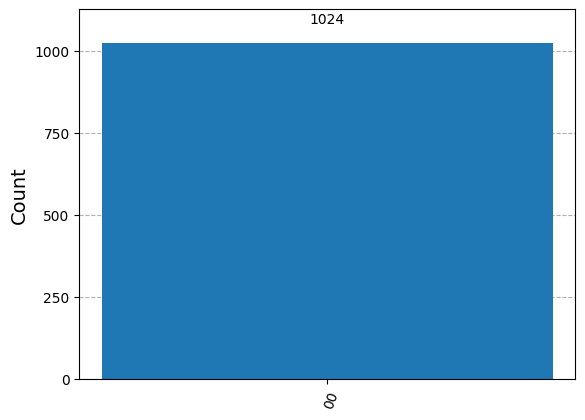

In [17]:
# Get the measurement counts and visualize
counts = measured_result.get_counts()
plot_histogram(counts)
plt.show()